In [18]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#from sklearn.preprocessing import scale, minmax_scale

In [5]:
df = pd.read_csv("Complete_by_class_Ordinal_comparison.csv", index_col=0)

Parece que hay cierta correlación entre los valores de alpha y el orden de qwk

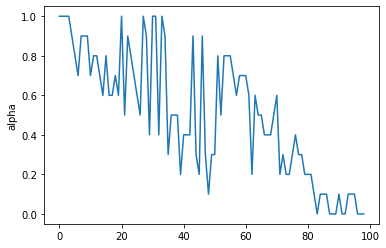

In [6]:
df_sorted = df.sort_values("qwk", ascending=False)

sns.lineplot(x=range(len(df)),
            y=df_sorted["alpha"]);

In [18]:
np.corrcoef(df_sorted["qwk"], df_sorted["alpha"])[0,1]

0.6232030567737908

Se puede ver muy claramente que en general funciona mucho mejor (de acuerdo a los valores de qwk) cuando se está utilizando menos ridge y más lasso (se "eliminan variables")

In [7]:
df_sorted.columns

Index(['Dataset', 'alpha', 'acc', 'qwk', 'precision_0', 'recall_0',
       'fbeta_score_0', 'precision_1', 'recall_1', 'fbeta_score_1',
       'precision_2', 'recall_2', 'fbeta_score_2', 'precision_3', 'recall_3',
       'fbeta_score_3', 'precision_4', 'recall_4', 'fbeta_score_4'],
      dtype='object')

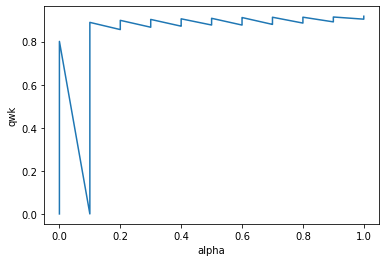

In [49]:
#_ = df[df["qwk"]>0.5].sort_values("qwk", ascending=False)

sns.lineplot(x=df_sorted["alpha"],
             y=df_sorted["qwk"],
             estimator=None);

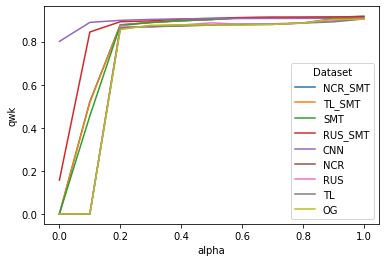

In [76]:
#_ = df[df["qwk"]>0.5].sort_values("qwk", ascending=False)
sns.lineplot(x=df_sorted["alpha"],
             y=df_sorted["qwk"],
             hue=df_sorted["Dataset"],
             estimator=None);

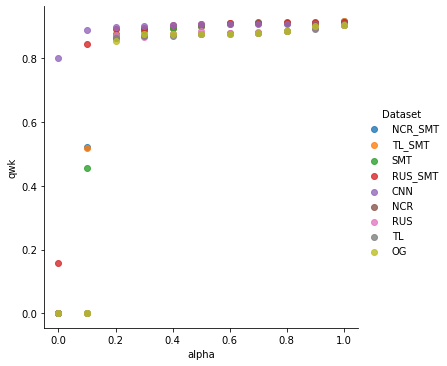

In [84]:
sns.lmplot(x="alpha",
           y="qwk",
           data=df_sorted,
           hue="Dataset",
           fit_reg=False);
           #estimator=None);

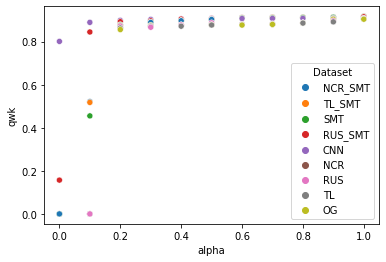

In [85]:
sns.scatterplot(x="alpha",
           y="qwk",
           data=df_sorted,
           hue="Dataset");

In [50]:
# No consigue hacer lo que quiero
# # https://stackoverflow.com/a/33561771

# import matplotlib.colors as colors
# import matplotlib.cm as cmx

# # https://stackoverflow.com/a/28033497
# # Get unique names of species
# uniq = list(set(df_sorted['Dataset']))
# # Set the color map to match the number of species
# z = range(1,len(uniq))
# hot = plt.get_cmap('hot')
# cNorm  = colors.Normalize(vmin=0, vmax=len(uniq))
# scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=hot)

# color_dict = dict(zip(uniq, range(len(uniq))))

# aux     = df_sorted[["alpha", "qwk", "Dataset"]]
# aux_grp = aux.groupby("Dataset")

# fig, ax = plt.subplots(1)

# for key, group in aux_grp:
#     #print(key)
#     aux_grp.plot(ax=ax, x="alpha", y="qwk", label=key, kind="line" color=scalarMap.to_rgba(color_dict[key]));
#     ### plt.scatter(ax=ax, x=aux_grp["alpha"], y=aux_grp["qwk"], label=key, color=scalarMap.to_rgba(color_dict[key]));

In [75]:
# dts_keys = df_sorted["Dataset"].to_list()
# #color_dict
# clrs_list = [color_dict[i] for i in dts_keys]

# scalarMap.to_rgba(clrs_list)

# sns.lineplot(x=df_sorted["alpha"],
#              y=df_sorted["qwk"],
#              #hue=df_sorted["Dataset"],
#              color=scalarMap.to_rgba(clrs_list),#color_dict[key]),
#              estimator=None);

<ipython-input-5-145f73f51991>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aux["qwk"][zrs] += 1e-20


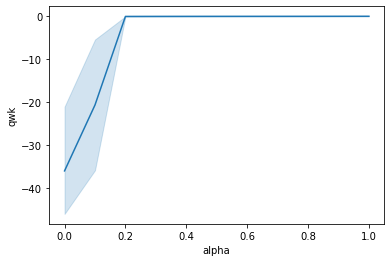

In [5]:
aux = df.sort_values("qwk", ascending=False)
# Quitar los valores de qwk que sean 0
#aux = aux[aux["qwk"]>np.finfo(float).eps*2]

# Sumar 1e-20 a los valores menores q eps de float
#aux = df.sort_values("qwk", ascending=False)
zrs = np.where(aux["qwk"]<np.finfo(float).eps)[0]
aux["qwk"][zrs] += 1e-20

sns.lineplot(x=aux["alpha"],
             y=np.log(aux["qwk"]));